# GF3: Synchronisation 
### Using gaussian white noise, time domain

In [16]:
#importing necessary libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sounddevice as sd
import time

#### Producing white noise

In [17]:
#parameters
SAMPLE_RATE = 44100  # Sample rate in Hz
DURATION = 1  # Duration of the white noise in seconds
RECORDING_DURATION = 15  # Duration of the recording in seconds

In [60]:
# Generate white noise, array of sample_rate * duration samples
np.random.seed(1026)
noise = np.random.normal(0, 1, SAMPLE_RATE * DURATION)

# Normalize the white noise + add silence at the beginning
# to avoid the initial click in recording spike
noise_initial = (np.concatenate((np.zeros(100000),noise))) / np.max(np.abs(noise))

noise = np.concatenate((noise_initial, np.tile(noise, 10)))
noise_2D = np.column_stack((noise, noise))



In [26]:
myrecording = sd.rec(int(SAMPLE_RATE * RECORDING_DURATION), samplerate=SAMPLE_RATE, channels=1)
sd.play(noise, SAMPLE_RATE)
# sd.sleep(int(3 * 1000))
# sd.play(noise, SAMPLE_RATE)
# sd.sleep(int(17 * 1000))
sd.wait()



#plt.plot(myrecording)


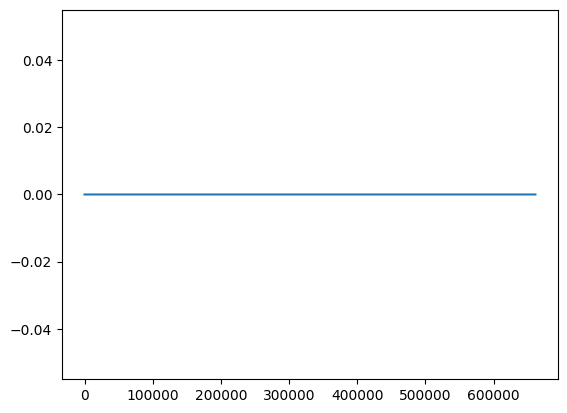

In [27]:
plt.plot(myrecording)
#sd.stop()

#### Recording white noise

In [61]:
# # # records the audio, use longer duration than the noise
# myrecording = sd.rec(int(RECORDING_DURATION * SAMPLE_RATE), samplerate=SAMPLE_RATE, channels=1)
# sd.play(noise_2D, SAMPLE_RATE)
# sd.wait()  # Wait until recording is finished
# plt.plot(myrecording)

# # # records the audio as it plays
selfrecording = sd.playrec(noise, SAMPLE_RATE, channels=1) 
sd.wait()  # Wait until the recording is finished



max value is  6.85265807922263
at index  603910


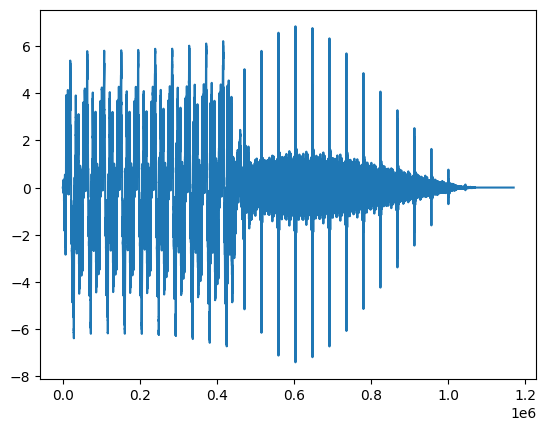

In [63]:
selfrecording_channel1 = selfrecording[:, 0]
noise2D_channel1 = noise_2D[:, 0]
#selfrecording_channel2 = selfrecording[:, 1]
noise2D_channel2 = noise_2D[:, 1]
myrecording_channel1 = 20*myrecording[50000:, 0]




sync = scipy.signal.correlate(selfrecording_channel1,noise2D_channel1, mode='full', method='auto')
#sync_2 = scipy.signal.correlate(selfrecording_channel2, noise2D_channel2, mode='full', method='auto')
#check the dimensionality of the selfrecording signal 
print("max value is ",np.max(sync))
print ("at index ",np.argmax(sync))

#plot the correlation
plt.plot(sync)


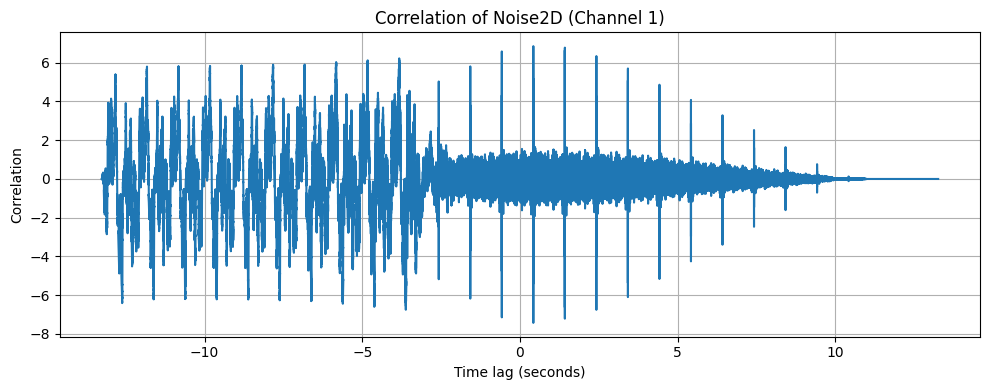

In [70]:
selfrecording_channel1 = selfrecording[:, 0]
noise2D_channel1 = noise_2D[:, 0]
myrecording_channel1 = 20 * myrecording[50000:, 0]

sync = scipy.signal.correlate(selfrecording_channel1, noise2D_channel1, mode='full', method='auto')
sync_2 = scipy.signal.correlate(noise2D_channel1, noise2D_channel1, mode='full', method='auto')

# Calculate time axis in seconds
lags = np.arange(-len(noise2D_channel1) + 1, len(selfrecording_channel1))
time_axis = lags / SAMPLE_RATE

# Plot
plt.figure(figsize=(10, 4))
plt.plot(time_axis, sync)
#plt.plot(time_axis, sync_2)
plt.title('Correlation of Noise2D (Channel 1)')
plt.xlabel('Time lag (seconds)')
plt.ylabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
# Plot
plt.figure(figsize=(10, 4))
plt.plot(time_axis, sync)
plt.plot(time_axis, sync_2)
plt.title('Correlation of Noise2D (Channel 1)')
plt.xlabel('Time lag (seconds)')
plt.ylabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined